# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_json('data/world_bank_projects.json')
df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{u'$oid': u'52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{u'Percent': 46, u'Name': u'Regional integrati...","[{u'code': u'47', u'name': u'Regional integrat...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{u'$oid': u'52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{u'Percent': 50, u'Name': u'Participation and ...","[{u'code': u'57', u'name': u'Participation and...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{u'$oid': u'52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Export development...","[{u'code': u'45', u'name': u'Export developmen...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [10]:
df.columns

Index([u'_id', u'approvalfy', u'board_approval_month', u'boardapprovaldate',
       u'borrower', u'closingdate', u'country_namecode', u'countrycode',
       u'countryname', u'countryshortname', u'docty',
       u'envassesmentcategorycode', u'grantamt', u'ibrdcommamt', u'id',
       u'idacommamt', u'impagency', u'lendinginstr', u'lendinginstrtype',
       u'lendprojectcost', u'majorsector_percent', u'mjsector_namecode',
       u'mjtheme', u'mjtheme_namecode', u'mjthemecode', u'prodline',
       u'prodlinetext', u'productlinetype', u'project_abstract',
       u'project_name', u'projectdocs', u'projectfinancialtype',
       u'projectstatusdisplay', u'regionname', u'sector', u'sector1',
       u'sector2', u'sector3', u'sector4', u'sector_namecode', u'sectorcode',
       u'source', u'status', u'supplementprojectflg', u'theme1',
       u'theme_namecode', u'themecode', u'totalamt', u'totalcommamt', u'url'],
      dtype='object')

In [11]:
df.shape

(500, 50)

In [12]:
cf = df.groupby(['countryname', 'countryshortname', 'countrycode']).size().reset_index(name='Projects')
cf = cf.sort_values(['Projects'],ascending=False)
cf = cf.head(10)

In [13]:
from IPython.display import display, HTML
display(HTML(cf.to_html(index=False)))

countryname,countryshortname,countrycode,Projects
People's Republic of China,China,CN,19
Republic of Indonesia,Indonesia,ID,19
Socialist Republic of Vietnam,Vietnam,VN,17
Republic of India,India,IN,16
Republic of Yemen,"Yemen, Republic of",RY,13
People's Republic of Bangladesh,Bangladesh,BD,12
Nepal,Nepal,NP,12
Kingdom of Morocco,Morocco,MA,12
Republic of Mozambique,Mozambique,MZ,11
Africa,Africa,3A,11


In [14]:
def plot_classes(x, y, plotfun=plt.scatter, **kwargs):
    from itertools import count
    import numpy as np
    classes = sorted(set(x))
    class_dict = dict(zip(classes, count()))
    class_map = lambda x: class_dict[x]
    plotfun(map(class_map, x), y, **kwargs)
    plt.xticks(np.arange(len(classes)), classes)

In [15]:
plot_classes(cf["countrycode"], cf["Projects"], marker="*")

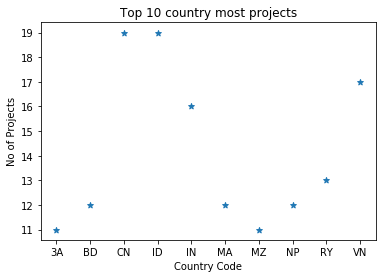

In [16]:
plt.title('Top 10 country most projects')
plt.xlabel('Country Code')
plt.ylabel('No of Projects')
plt.show()

In [17]:
df.mjtheme_namecode.head(2)

0    [{u'code': u'8', u'name': u'Human development'...
1    [{u'code': u'1', u'name': u'Economic managemen...
Name: mjtheme_namecode, dtype: object

In [18]:
tf = df.filter(['id','source','satus','mjtheme_namecode','mjtheme','mjthemecode'], axis=1)

In [19]:
tf.head()

,id,source,mjtheme_namecode,mjtheme,mjthemecode
0,P129828,IBRD,"[{u'code': u'8', u'name': u'Human development'...",[Human development],"8,11"
1,P144674,IBRD,"[{u'code': u'1', u'name': u'Economic managemen...","[Economic management, Social protection and ri...","1,6"
2,P145310,IBRD,"[{u'code': u'5', u'name': u'Trade and integrat...","[Trade and integration, Public sector governan...","5,2,11,6"
3,P144665,IBRD,"[{u'code': u'7', u'name': u'Social dev/gender/...","[Social dev/gender/inclusion, Social dev/gende...","7,7"
4,P144933,IBRD,"[{u'code': u'5', u'name': u'Trade and integrat...","[Trade and integration, Financial and private ...","5,4"


In [20]:
from collections import defaultdict
theme = dict()
freq = defaultdict(int)
for i in tf.mjtheme_namecode:
    for j in i:
        if len(j['name']):
            theme[j['code']] = j['name']
        freq[j['code']] += 1
print theme

{u'11': u'Environment and natural resources management', u'10': u'Rural development', u'1': u'Economic management', u'3': u'Rule of law', u'2': u'Public sector governance', u'5': u'Trade and integration', u'4': u'Financial and private sector development', u'7': u'Social dev/gender/inclusion', u'6': u'Social protection and risk management', u'9': u'Urban development', u'8': u'Human development'}


In [21]:
af = pd.DataFrame()
af['mjthemecode'] = [i for i in freq]
af['Projects'] = [freq[i] for i in freq]
af['mjthemename'] = [theme[i] for i in freq]
af

,mjthemecode,Projects,mjthemename
0,11,250,Environment and natural resources management
1,10,216,Rural development
2,1,38,Economic management
3,3,15,Rule of law
4,2,199,Public sector governance
5,5,77,Trade and integration
6,4,146,Financial and private sector development
7,7,130,Social dev/gender/inclusion
8,6,168,Social protection and risk management
9,9,50,Urban development


In [22]:
plot_classes(af["mjthemecode"], af["Projects"], marker="*")

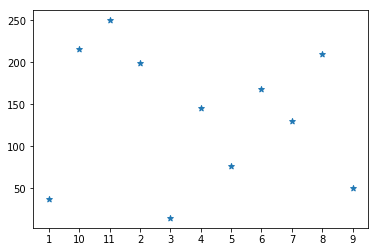

In [23]:
plt.show()

In [24]:
dicts = []
for i in tf.mjtheme_namecode:
    for j in i:
        if len(j['name']) == 0:
            j['name'] = theme[j['code']]

In [25]:
tf.shape

(500, 5)

In [26]:
tf.head()

,id,source,mjtheme_namecode,mjtheme,mjthemecode
0,P129828,IBRD,"[{u'code': u'8', u'name': u'Human development'...",[Human development],"8,11"
1,P144674,IBRD,"[{u'code': u'1', u'name': u'Economic managemen...","[Economic management, Social protection and ri...","1,6"
2,P145310,IBRD,"[{u'code': u'5', u'name': u'Trade and integrat...","[Trade and integration, Public sector governan...","5,2,11,6"
3,P144665,IBRD,"[{u'code': u'7', u'name': u'Social dev/gender/...","[Social dev/gender/inclusion, Social dev/gende...","7,7"
4,P144933,IBRD,"[{u'code': u'5', u'name': u'Trade and integrat...","[Trade and integration, Financial and private ...","5,4"


In [27]:
ls = []
for i in df.mjthemecode:
    vl = []
    for j in i.split(','):
        vl.append(theme[j])
    ls.append(vl)
tf['mjtheme'] = ls
        

In [28]:
tf.head()

,id,source,mjtheme_namecode,mjtheme,mjthemecode
0,P129828,IBRD,"[{u'code': u'8', u'name': u'Human development'...","[Human development, Environment and natural re...","8,11"
1,P144674,IBRD,"[{u'code': u'1', u'name': u'Economic managemen...","[Economic management, Social protection and ri...","1,6"
2,P145310,IBRD,"[{u'code': u'5', u'name': u'Trade and integrat...","[Trade and integration, Public sector governan...","5,2,11,6"
3,P144665,IBRD,"[{u'code': u'7', u'name': u'Social dev/gender/...","[Social dev/gender/inclusion, Social dev/gende...","7,7"
4,P144933,IBRD,"[{u'code': u'5', u'name': u'Trade and integrat...","[Trade and integration, Financial and private ...","5,4"


In [30]:
df.mjtheme_namecode = tf.mjtheme_namecode
df.mjtheme = tf.mjtheme

In [32]:
display(HTML(df.head(2).to_html(index=False)))

_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,docty,envassesmentcategorycode,grantamt,ibrdcommamt,id,idacommamt,impagency,lendinginstr,lendinginstrtype,lendprojectcost,majorsector_percent,mjsector_namecode,mjtheme,mjtheme_namecode,mjthemecode,prodline,prodlinetext,productlinetype,project_abstract,project_name,projectdocs,projectfinancialtype,projectstatusdisplay,regionname,sector,sector1,sector2,sector3,sector4,sector_namecode,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,"Project Information Document,Indigenous People...",C,0,0,P129828,130000000,MINISTRY OF EDUCATION,Investment Project Financing,IN,550000000,"[{u'Percent': 46, u'Name': u'Education'}, {u'P...","[{u'code': u'EX', u'name': u'Education'}, {u'c...","[Human development, Environment and natural re...","[{u'code': u'8', u'name': u'Human development'...","8,11",PE,IBRD/IDA,L,{u'cdata': u'The development objective of the ...,Ethiopia General Education Quality Improvement...,"[{u'DocDate': u'28-AUG-2013', u'EntityID': u'0...",IDA,Active,Africa,"[{u'Name': u'Primary education'}, {u'Name': u'...","{u'Percent': 46, u'Name': u'Primary education'}","{u'Percent': 26, u'Name': u'Secondary education'}","{u'Percent': 16, u'Name': u'Public administrat...","{u'Percent': 12, u'Name': u'Tertiary education'}","[{u'code': u'EP', u'name': u'Primary education...","ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,"Project Information Document,Integrated Safegu...",C,4700000,0,P144674,0,MINISTRY OF FINANCE,Specific Investment Loan,IN,5700000,"[{u'Percent': 70, u'Name': u'Public Administra...","[{u'code': u'BX', u'name': u'Public Administra...","[Economic management, Social protection and ri...","[{u'code': u'1', u'name': u'Economic managemen...","1,6",RE,Recipient Executed Activities,L,NaN,TN: DTF Social Protection Reforms Support,"[{u'DocDate': u'29-MAR-2013', u'EntityID': u'0...",OTHER,Active,Middle East and North Africa,[{u'Name': u'Public administration- Other soci...,"{u'Percent': 70, u'Name': u'Public administrat...","{u'Percent': 30, u'Name': u'General public adm...",NaN,NaN,"[{u'code': u'BS', u'name': u'Public administra...","BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


In [35]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')
df.to_csv('cleaned_data.csv')